<a href="https://colab.research.google.com/github/jane-muthoka/python-codes/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd

In [2]:
#loding the data
customer_data = pd.read_csv('ihub.csv')

In [3]:
customer_data.head()

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
0,70,Male,4.0,1,Single,1,57.0,52,57.2,49.2
1,121,Female,4.0,2,Single,3,68.0,59,64.9,63.6
2,86,Male,4.0,3,Single,1,44.0,33,36.3,64.8
3,141,Male,4.0,3,Single,3,63.0,44,48.4,56.4
4,172,NaN,NaN,2,NaN,2,NaN,52,NaN,NaN


Understanding data

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   custid                       202 non-null    int64  
 1   sex                          201 non-null    object 
 2   channel                      201 non-null    float64
 3   region                       202 non-null    int64  
 4   marital_status               201 non-null    object 
 5   segment                      202 non-null    int64  
 6   usage_before_campaign        201 non-null    float64
 7   usage_after_campaign_month1  202 non-null    int64  
 8   usage_after_campaign_month2  201 non-null    float64
 9   latest_month_usage           201 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 15.9+ KB


In [5]:
customer_data.describe()

,custid,channel,region,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
count,202.000000,201.000000,202.000000,202.000000,201.000000,202.000000,201.000000,201.000000
mean,100.064356,3.427861,2.049505,2.029703,52.258706,52.762376,58.138308,63.122388
std,57.785336,1.037314,0.724500,0.690453,10.248060,9.448102,10.578798,11.210903
min,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,34.100000,39.600000
25%,50.250000,3.000000,2.000000,2.000000,44.000000,46.000000,50.600000,54.000000
50%,99.500000,4.000000,2.000000,2.000000,50.000000,54.000000,59.400000,62.400000
75%,149.750000,4.000000,3.000000,2.750000,60.000000,60.000000,66.000000,70.800000
max,200.000000,4.000000,3.000000,3.000000,76.000000,67.000000,85.200000,90.000000


In [6]:
customer_data.shape

(202, 10)

In [8]:
customer_data.shape[0]

202

data cleaning

In [9]:
#duplicates,nulls,outliers
customer_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 202, dtype: bool

In [24]:
customer_data.duplicated().sum()

0

In [22]:
#drop duplicates
df=customer_data.drop_duplicates(inplace=True)

In [25]:
customer_data.head()

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
0,70,Male,4.0,1,Single,1,57.0,52,57.2,49.2
1,121,Female,4.0,2,Single,3,68.0,59,64.9,63.6
2,86,Male,4.0,3,Single,1,44.0,33,36.3,64.8
3,141,Male,4.0,3,Single,3,63.0,44,48.4,56.4
4,172,NaN,NaN,2,NaN,2,NaN,52,NaN,NaN


In [27]:
customer_data.duplicated().sum()

0

In [29]:
#check nulls
customer_data.isnull().sum()

custid                         0
sex                            1
channel                        1
region                         0
marital_status                 1
segment                        0
usage_before_campaign          1
usage_after_campaign_month1    0
usage_after_campaign_month2    1
latest_month_usage             1
dtype: int64

In [34]:
customer_data[customer_data.isnull().any(inplace= True)]

TypeError: ignored

In [31]:
customer_data.dropna(inplace= True)

In [35]:
customer_data.columns

Index(['custid', 'sex', 'channel', 'region', 'marital_status', 'segment',
       'usage_before_campaign', 'usage_after_campaign_month1',
       'usage_after_campaign_month2', 'latest_month_usage'],
      dtype='object')

<Axes: >

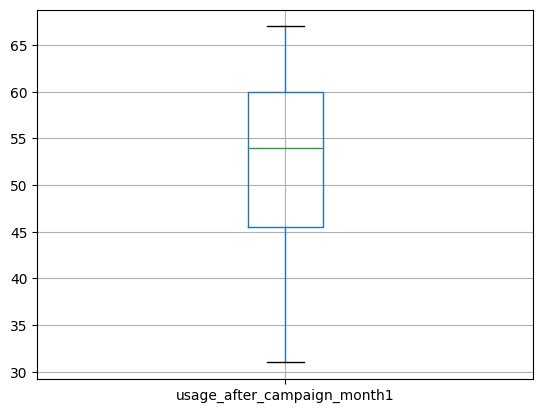

In [37]:
#outliers
customer_data.boxplot(column= 'usage_after_campaign_month1')

Encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
marry=pd.get_dummies(customer_data['marital_status'],drop_first= True)

In [44]:
marry.head()

,Single
0,1
1,1
2,1
3,1
5,1


In [45]:
customer_data =pd.concat([customer_data,married],axis=1)

In [ ]:
#or add directly
customer_data['marital_status'] = married

In [46]:
customer_data.drop('marital_status',axis=1,inplace= True)

In [47]:
customer_data.head()

,custid,sex,channel,region,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage,Single
0,70,Male,4.0,1,1,57.0,52,57.2,49.2,1
1,121,Female,4.0,2,3,68.0,59,64.9,63.6,1
2,86,Male,4.0,3,1,44.0,33,36.3,64.8,1
3,141,Male,4.0,3,3,63.0,44,48.4,56.4,1
5,113,Male,4.0,2,2,44.0,52,57.2,61.2,1


In [49]:
customer_data.rename(columns={'single': 'status'}, inplace=True)

In [50]:
customer_data

,custid,sex,channel,region,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage,Single
0,70,Male,4.0,1,1,57.0,52,57.2,49.2,1
1,121,Female,4.0,2,3,68.0,59,64.9,63.6,1
2,86,Male,4.0,3,1,44.0,33,36.3,64.8,1
3,141,Male,4.0,3,3,63.0,44,48.4,56.4,1
5,113,Male,4.0,2,2,44.0,52,57.2,61.2,1
...,...,...,...,...,...,...,...,...,...,...
197,31,Female,2.0,2,1,55.0,59,64.9,62.4,0
198,145,Female,4.0,2,3,42.0,46,50.6,45.6,1
199,187,Female,4.0,2,1,57.0,41,45.1,68.4,0
200,118,Female,4.0,2,1,55.0,62,68.2,69.6,1


null-there is no change in credit card usage after the campaign
alternative-

In [51]:
import scipy.stats as stats
stats.ttest_rel(a = customer_data.usage_before_campaign,b= customer_data.usage_after_campaign_month1)

TtestResult(statistic=-0.8280370466338398, pvalue=0.40864646025743323, df=198)